## Project: Dimensionality Reduction
### Part B: Regression

#### Table of Contents

- [Import](#import)
- [Dataset Summary](#dataset-summary)
- [Algorithm Summary](#algorithm-summary)

Dimensionality Reduction
- [Blog Feedback](#blog---comments-count-prediction)
- [Buzz Event](#buzz-events)
- [Violent Crime](#violent-crime)
- [CT Slice](#ct-slice)
- [Facebook comments Volume](#facebook---comment-volume)
- [Indoor Location](#indoor-location)
- [Energy](#energy)

### Import

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io.arff import loadarff
from scipy.io import loadmat 
import arff
import json

from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler

from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,VotingRegressor,BaggingRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor,RadiusNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso,SGDRegressor,ElasticNet,HuberRegressor,RANSACRegressor,PassiveAggressiveRegressor

from sklearn.decomposition import PCA,FastICA,KernelPCA,LatentDirichletAllocation,MiniBatchDictionaryLearning, TruncatedSVD,NMF
from sklearn.manifold import LocallyLinearEmbedding,MDS,TSNE,SpectralEmbedding


In [3]:
regressor_list = [
    RandomForestRegressor,
    GradientBoostingRegressor,
    AdaBoostRegressor,
    VotingRegressor,
    BaggingRegressor,
    ExtraTreesRegressor,
    HistGradientBoostingRegressor,
    MLPRegressor,
    KNeighborsRegressor,
    RadiusNeighborsRegressor,
    GaussianProcessRegressor,
    DecisionTreeRegressor,
    DummyRegressor,
    LinearRegression,
    Lasso,
    Ridge,
    ElasticNet,
    HuberRegressor,
    RANSACRegressor,
    PassiveAggressiveRegressor,
    SGDRegressor
]

**Note:**
I opted to use selected regressors for LazyPredict as some classifiers took extremely long to process (greater than 1 hour for a single iteration). I was careful not to remove performant classifiers.

### Dataset Summary

- **Blog Comment Count Prediction** - Based on the features extracted from a post, the task was to predict the number of comments it would receive. The feature vector included features like number of comments within 24 hours and 200 bag of words features as well.

- **Buzz Events** - The dataset contains data related to two social media platforms, Twitter and Tom's Hardware. The task was to predict buzz generated which was represented by the mean number of display for the instance (post)'s topic. The dataset included features like number of discussions created, burstiness level and other such features.
  
- **Violent Crime** - Communities in the US. Data combines socio-economic data from the '90 Census, law enforcement data from the 1990 Law Enforcement Management and Admin Stats survey, and crime data from the 1995 FBI UCR. The dataset has 125 predictive, 4 non-predictive, 18 potential goal features.
   
- **CT Slice** -  The dataset consists of 384 features extracted from CT images. The class variable is numeric and denotes the relative location of the CT slice on the axial axis of the human body. The feature set consist of Histogram describing bone structures and air inclusions. The target column is the Relative location of the image on the axial axis in the range [0; 180] where 0 denotes the top of the head and 180 the soles of the feet.

- **Facebook Comments Volume** - Instances in this dataset contain features extracted from facebook posts. The task associated with the data is to predict how many comments the post will receive. In terms of goal, it is very similar to the first dataset but instead of bag of words features, the feature set comprises of most temporal information.

- **Indoor Location** - The UJIIndoorLoc is a Multi-Building Multi-Floor indoor localization database to test Indoor Positioning System that rely on WLAN/WiFi fingerprint. The dataset provides multiple target columns to define the location in 3 dimensional space including classification targets like building and floor.

- **Energy** - Experimental data used to create regression models of appliances energy use in a low energy building. The feature set consist of temperature and humidity readings in various rooms apat from some other environmental variables.

### Algorithm Summary
- **PCA** - One of the most common techniques for reducing dimension where the coveriance matrix of the features can be transformed into eigenvalue/eigenvector. Dimensionality can be reduced by selecting components with higher variance as the new features.
  
- **ICA** - Independent Component Analysis may look similar to PCA but is slightly different in the assumption that the independent component are assumed to be non-gaussian and the focus is on maximizing independence rather than correlation like PCA.

- **Kernal PCA** - Kernel PCA is an extension to PCA which uses kernel methods to perform linear transformation. This allows us to use different kernel function such as cosine, sigmoidal, exponentional to transform data.
   
- **Mini Batch Dictionary Learning** - Dictionary learning a sparse-coding technique in which the goal is to determine basis components called atoms that can be used to mimic the original data point.
  
- **Truncated SVD** - Truncated SVD is an extension Singular Value Decomposition algorithm which uses a truncated U matrix to decompose the real matrix resulting in blazing fast dimension reduction.

- **NMF** - Non Negative Matrix Factorization is a similat technique to PCA and SVD but results in non-negative components.
  
- **Latent Dirichlet Allocation** - Latent Dirichlet Allocation is originally used for topic-modelling but if we consider each topic as the new basis, the feature vector for each row can be expressed in terms of the topics.
   
- **Locally Linear Embedding** -  Locally Linear Embedding works by determining linear mapping—consisting
of a translation, rotation, and rescaling that maps the high dimensional coordinates of each neighborhood to global internal coordinates on the manifold.

- **MDS** - Multi-dimensional Scaling aims to reduce dimensionality by transforming the data into a lower dimension ensuring that the pairwise distance between each instance is maintained across the transformation.
  
- **t-SNE** - t-distributed Stochastic Neighbour Embedding is non-linear dimension reduction technique with goals of placing similar datapoints together. t-SNE was geared towards visualizng high dimensional data and therefore, works well with components <= 3
  
- **Linear Discriminant Analysis** - Linear Discriminant Analysis although similar to PCA is supervised dimensionality reduction technique and the goal is to maximize the separation between different classes. In its implementation the algorithm requires the number of components to be equal to the number of classes.
  
- **Spectral Embedding** - Spectral Embedding is another non-linear dimensionality reduction technique which uses Laplacian Eigenmaps for the transformation. Laplacian Eigenmaps ensures preservation of local geometry in the data. It relies on the basic assumption the the high dimensional data lies in the low dimensional manifold.


### Blog - Comments Count Prediction
[Back to top](#table-of-contents)

In [4]:
path = r"datasets/R_BlogFeedback/blogData.csv"

data = pd.read_csv(path,header=None)
data = data.sample(10000,random_state=123)
print(f"Data Shape: {data.shape}")
data.head()

Data Shape: (10000, 281)


,0,1,2,3,4,5,6,7,8,9,...,271,272,273,274,275,276,277,278,279,280
12832,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
45519,2.27,4.98,0.00,44.00,1.00,1.03,3.00,0.00,37.00,0.00,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
3973,13.13,19.31,0.00,159.00,6.00,6.24,9.53,0.00,92.00,3.00,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.00
38793,45.23,51.24,10.00,243.00,29.00,17.56,27.14,0.00,153.00,11.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
19427,29.23,43.90,0.00,319.00,14.00,12.17,24.50,0.00,203.00,5.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,13.00


**Observation:** Data had to be sampled due to large size.

In [5]:
X = data.copy(deep=True)
del X[280]
y = data[280]

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)

#### Original Data

In [37]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [01:26<00:00,  4.13s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.43,0.48,25.97,17.41
BaggingRegressor,0.42,0.47,26.24,1.72
HistGradientBoostingRegressor,0.41,0.46,26.47,2.57
ExtraTreesRegressor,0.41,0.46,26.54,12.68
GradientBoostingRegressor,0.34,0.40,27.97,4.66
Lasso,0.25,0.32,29.90,0.13
ElasticNet,0.24,0.31,30.10,0.15
Ridge,0.23,0.30,30.25,0.07
KNeighborsRegressor,0.22,0.30,30.34,5.51


#### Observations
Better result with scaling 0.43 vs no scaling 0.4

#### PCA

In [42]:
n = 16
pca = PCA(n_components = n)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
pca.fit(X_train)
print(f"Explained variance with {n} components: {np.sum(pca.explained_variance_ratio_)}")
X_dr = pca.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

Explained variance with 16 components: 0.9999856938813453


In [45]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [00:29<00:00,  1.40s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
MLPRegressor,0.41,0.41,27.75,5.52
HistGradientBoostingRegressor,0.39,0.40,28.09,1.20
BaggingRegressor,0.38,0.38,28.42,1.09
RandomForestRegressor,0.37,0.37,28.58,10.68
ExtraTreesRegressor,0.36,0.36,28.84,1.54
KNeighborsRegressor,0.34,0.34,29.26,0.12
Lasso,0.32,0.32,29.80,0.01
Ridge,0.32,0.32,29.82,0.01
LinearRegression,0.32,0.32,29.82,0.01


##### Observation
Variance becomes hard to capture with fewer if the data is scaled.

Heuristic number of compnents to choose = sqroot(n)

#### ICA

In [54]:
n = 16
ica = FastICA(n)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
ica.fit(X_train)
X_dr = ica.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [57]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [00:28<00:00,  1.38s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
MLPRegressor,0.41,0.42,27.63,4.17
RandomForestRegressor,0.38,0.38,28.39,11.77
KNeighborsRegressor,0.34,0.34,29.26,0.14
HistGradientBoostingRegressor,0.33,0.34,29.45,0.82
Ridge,0.32,0.32,29.82,0.01
LinearRegression,0.32,0.32,29.82,0.01
GradientBoostingRegressor,0.32,0.32,29.82,2.59
ExtraTreesRegressor,0.31,0.32,29.88,1.66
Lasso,0.31,0.31,29.95,0.01


##### Observation
Got very similar results when same number of components are selected. This may be because ICA is a generalization of PCA. Also, slightly slower than PCA.

#### Kernel PCA

In [51]:
n = 16
kpca = KernelPCA(n_components = n,kernel="cosine")

KernelPCA(kernel='cosine', n_components=16)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
kpca.fit(X_train)
X_dr = kpca.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [53]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [00:23<00:00,  1.13s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
MLPRegressor,0.29,0.30,30.28,3.73
KNeighborsRegressor,0.26,0.26,31.08,0.12
GradientBoostingRegressor,0.21,0.21,32.11,2.58
RandomForestRegressor,0.20,0.21,32.16,8.34
ExtraTreesRegressor,0.20,0.20,32.27,1.41
HistGradientBoostingRegressor,0.17,0.18,32.82,0.53
Ridge,0.15,0.16,33.13,0.01
LinearRegression,0.15,0.16,33.13,0.01
Lasso,0.15,0.16,33.22,0.01


##### Observation
Using PCA with Sigmoid kernel gave very poor results. Poly kernel gave better results. The best results were observed with cosine kernel.

#### LDA

In [67]:
n = 16
lda = LatentDirichletAllocation(n_components = n)

In [68]:
scaler = MinMaxScaler()
X_dr = scaler.fit_transform(X)
lda.fit(X_dr)
X_dr = lda.transform(X_dr)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [69]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [00:24<00:00,  1.16s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
BaggingRegressor,0.19,0.19,32.53,0.82
HistGradientBoostingRegressor,0.17,0.17,32.93,0.78
MLPRegressor,0.16,0.17,32.94,4.11
RandomForestRegressor,0.16,0.17,32.98,8.70
GradientBoostingRegressor,0.14,0.15,33.35,2.01
ExtraTreesRegressor,0.13,0.13,33.68,1.54
Ridge,0.10,0.11,34.12,0.01
LinearRegression,0.10,0.11,34.13,0.01
Lasso,0.10,0.11,34.13,0.01


##### Observation
With the same number of components, LDA got worse results.

#### Mini Batch Dictionary Learning

In [70]:
n = 16
mbdl = MiniBatchDictionaryLearning(n_components = n)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
mbdl.fit(X_train)
X_dr = mbdl.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [73]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [00:26<00:00,  1.25s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
MLPRegressor,0.32,0.32,29.81,3.81
LinearRegression,0.31,0.32,29.83,0.01
Ridge,0.31,0.31,29.92,0.01
RandomForestRegressor,0.29,0.29,30.46,9.79
HistGradientBoostingRegressor,0.28,0.29,30.52,0.77
BaggingRegressor,0.28,0.29,30.56,0.97
SGDRegressor,0.28,0.28,30.58,0.01
KNeighborsRegressor,0.26,0.27,30.94,0.06
GradientBoostingRegressor,0.25,0.26,31.13,2.54


##### Observation
When higher components were used, the dimension reduction took a long time.

#### Truncated SVD

In [84]:
n = 16
tsvd = TruncatedSVD(n_components = n)

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
tsvd.fit(X_train)
X_dr = tsvd.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [86]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [00:29<00:00,  1.43s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
MLPRegressor,0.40,0.40,27.94,5.02
RandomForestRegressor,0.38,0.39,28.31,11.39
HistGradientBoostingRegressor,0.38,0.38,28.42,1.41
BaggingRegressor,0.36,0.36,28.83,1.19
ExtraTreesRegressor,0.35,0.35,29.15,1.61
KNeighborsRegressor,0.34,0.34,29.30,0.12
Ridge,0.32,0.32,29.82,0.01
LinearRegression,0.32,0.32,29.82,0.02
Lasso,0.31,0.32,29.89,0.01


##### Observation

#### NMF

In [87]:
n = 16
nmf = NMF(n_components = n)

In [89]:
scaler = MinMaxScaler()
X_dr = scaler.fit_transform(X)
nmf.fit(X_dr)
X_dr = nmf.transform(X_dr)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [90]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [00:19<00:00,  1.09it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.19,0.20,32.41,1.39
HistGradientBoostingRegressor,0.19,0.19,32.47,0.70
BaggingRegressor,0.18,0.19,32.56,0.52
MLPRegressor,0.17,0.17,32.88,3.93
RandomForestRegressor,0.15,0.15,33.29,5.04
GradientBoostingRegressor,0.13,0.13,33.65,1.53
Lasso,0.11,0.11,34.01,0.01
Ridge,0.11,0.11,34.06,0.01
LinearRegression,0.11,0.11,34.06,0.01


##### Observation


#### Locally Linear Embedding

In [98]:
n = 16
lle = LocallyLinearEmbedding(n_components = n)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
lle.fit(X_train)
X_dr = lle.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [100]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [00:24<00:00,  1.15s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
MLPRegressor,0.19,0.20,32.35,5.02
HistGradientBoostingRegressor,0.17,0.17,32.90,1.91
AdaBoostRegressor,0.13,0.13,33.69,0.09
KNeighborsRegressor,0.12,0.12,33.83,0.05
GradientBoostingRegressor,0.11,0.12,34.00,1.74
RandomForestRegressor,0.10,0.10,34.22,5.86
ExtraTreesRegressor,0.06,0.06,34.97,1.26
Ridge,0.05,0.06,35.05,0.01
LinearRegression,0.05,0.06,35.05,0.01


##### Observation
Slower for higher dimension. Performane not on par with PCA.

#### MDS

In [101]:
n = 16
mds = MDS(n_components = n)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
mds.fit(X_train)
X_dr = mds.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [ ]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

##### Observation

#### TSNE

In [108]:
n = 3
tsne = TSNE(n_components = n)

In [109]:
X_dr = tsne.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [110]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [00:11<00:00,  1.80it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.20,0.20,32.31,0.46
KNeighborsRegressor,0.20,0.20,32.35,0.01
RandomForestRegressor,0.20,0.20,32.37,1.55
GaussianProcessRegressor,0.19,0.19,32.57,4.80
GradientBoostingRegressor,0.12,0.13,33.80,0.52
RadiusNeighborsRegressor,0.11,0.11,34.07,0.15
MLPRegressor,0.10,0.10,34.21,3.16
ExtraTreesRegressor,0.09,0.09,34.50,0.54
BaggingRegressor,0.07,0.07,34.91,0.17


##### Observation

#### Spectral Embedding

In [105]:
n = 16
spec = SpectralEmbedding(n_components = n)

In [106]:
X_dr = spec.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [107]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [00:25<00:00,  1.24s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
MLPRegressor,0.10,0.10,34.23,3.97
ElasticNet,0.09,0.09,34.46,0.01
Lasso,0.09,0.09,34.46,0.01
Ridge,0.09,0.09,34.46,0.01
LinearRegression,0.09,0.09,34.46,0.02
SGDRegressor,0.07,0.08,34.75,0.02
PassiveAggressiveRegressor,0.05,0.05,35.16,0.01
RandomForestRegressor,0.00,0.01,36.01,10.23
DummyRegressor,-0.01,-0.00,36.14,0.01


### Buzz Events
[Back to top](#table-of-contents)

In [129]:
path = r"datasets/R_Buzz/Twitter.data"

data = pd.read_csv(path,header=None)
data = data.sample(20000,random_state=123)
print(f"Data Shape: {data.shape}")
data.head()

Data Shape: (20000, 78)


,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
479364,20,25,35,31,25,26,37,16,21,34,...,1.00,1.00,20,25,35,31,25,26,37,23.00
239009,1,0,0,0,1,1,0,1,0,0,...,1.00,0.00,1,0,0,0,1,1,0,1.50
98254,384,359,303,359,405,425,551,145,148,151,...,1.00,1.00,384,359,303,359,405,425,551,328.00
449852,1707,1614,1720,1453,2641,1871,1619,579,569,585,...,1.28,1.34,1707,1614,1720,1455,2647,1894,1638,1661.50
243919,522,472,514,688,608,621,627,183,162,138,...,1.02,1.03,524,472,515,690,608,621,627,694.50


**Observation:** Data subsampled due to large size.

In [132]:
X = data.copy(deep=True)
del X[77]
y = data[77]

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)

**Observation:** Data was scaled but no performance was observed.

#### Original Data

In [ ]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [02:12<00:00,  6.32s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HuberRegressor,0.94,0.94,129.47,0.32
Ridge,0.93,0.93,132.07,0.03
Lasso,0.93,0.93,132.27,0.77
LinearRegression,0.93,0.93,132.69,0.04
MLPRegressor,0.93,0.93,133.52,11.48
PassiveAggressiveRegressor,0.93,0.93,135.53,0.07
ElasticNet,0.92,0.92,145.14,0.55
GradientBoostingRegressor,0.91,0.91,153.88,9.47
ExtraTreesRegressor,0.90,0.91,157.31,13.38


**Observation:** The original dataset gave fairly good results. R2 score was good but RMSE was probably a little high. Linear models dominated.

#### PCA

In [15]:
n = 7
pca = PCA(n_components = n)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
pca.fit(X_train)
print(f"Explained variance with {n} components: {np.sum(pca.explained_variance_ratio_)}")
X_dr = pca.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

Explained variance with 7 components: 0.9909222386670762


In [17]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [00:56<00:00,  2.68s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
MLPRegressor,0.93,0.93,139.99,7.08
Lasso,0.92,0.92,146.55,0.01
Ridge,0.92,0.92,146.87,0.01
LinearRegression,0.92,0.92,146.88,0.01
PassiveAggressiveRegressor,0.92,0.92,147.64,0.02
HuberRegressor,0.92,0.92,147.82,0.06
ExtraTreesRegressor,0.90,0.90,164.78,2.32
GradientBoostingRegressor,0.88,0.88,173.99,2.48
RandomForestRegressor,0.88,0.88,175.44,7.61


**Observation:** With just 7 components, similar performance was obtained as the original data.

#### ICA

In [24]:
n = 7
ica = FastICA(n)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
ica.fit(X_train)
X_dr = ica.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [26]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [00:58<00:00,  2.78s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
MLPRegressor,0.92,0.92,140.96,6.86
Lasso,0.92,0.92,146.53,0.01
Ridge,0.92,0.92,146.87,0.01
LinearRegression,0.92,0.92,146.88,0.01
PassiveAggressiveRegressor,0.92,0.92,147.67,0.02
HuberRegressor,0.92,0.92,147.82,0.05
ExtraTreesRegressor,0.91,0.91,152.35,2.57
SGDRegressor,0.87,0.87,187.10,0.02
RANSACRegressor,0.86,0.86,189.62,0.03


**Observation:** Got very similar results when same number of components are selected; the performance may be slightly lower. This may be because ICA is a generalization of PCA.

#### Kernel PCA

In [140]:
n = 7
kpca = KernelPCA(n_components = n,kernel="linear")

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
kpca.fit(X_train)
X_dr = kpca.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [142]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [01:00<00:00,  2.87s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.83,0.83,211.31,0.42
KNeighborsRegressor,0.79,0.79,234.67,0.07
GradientBoostingRegressor,0.79,0.79,236.94,2.22
ExtraTreesRegressor,0.78,0.78,237.93,2.64
RandomForestRegressor,0.78,0.78,238.91,7.74
BaggingRegressor,0.77,0.77,246.48,0.77
MLPRegressor,0.74,0.74,262.23,7.08
AdaBoostRegressor,0.73,0.73,264.65,0.30
DecisionTreeRegressor,0.69,0.69,283.89,0.15


**Observation:** Non linear kernel performed poorly

#### LDA

In [40]:
n = 7
lda = LatentDirichletAllocation(n_components = n)

In [41]:
scaler = MinMaxScaler()
X_dr = scaler.fit_transform(X)
lda.fit(X_dr)
X_dr = lda.transform(X_dr)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [42]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [00:54<00:00,  2.60s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
KNeighborsRegressor,0.81,0.81,225.48,0.04
GradientBoostingRegressor,0.79,0.79,232.76,2.34
RandomForestRegressor,0.79,0.79,234.97,7.34
AdaBoostRegressor,0.79,0.79,237.46,0.26
BaggingRegressor,0.78,0.78,238.90,0.74
HistGradientBoostingRegressor,0.78,0.78,239.15,0.28
ExtraTreesRegressor,0.78,0.78,240.93,2.24
DecisionTreeRegressor,0.71,0.71,277.82,0.16
MLPRegressor,0.38,0.38,403.70,7.00


**Observation:** LDA did not perform as well as other with this dataset but ensemble regressors dominated in contrast to linear models.

#### Mini Batch Dictionary Learning

In [49]:
n = 7
mbdl = MiniBatchDictionaryLearning(n_components = n)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
mbdl.fit(X_train)
X_dr = mbdl.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [51]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [00:58<00:00,  2.78s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HuberRegressor,0.91,0.91,152.15,0.10
Lasso,0.91,0.91,153.70,0.02
LinearRegression,0.91,0.91,154.47,0.01
Ridge,0.91,0.91,154.49,0.01
SGDRegressor,0.91,0.91,155.34,0.02
PassiveAggressiveRegressor,0.90,0.90,159.01,0.02
MLPRegressor,0.89,0.89,168.30,6.92
RANSACRegressor,0.84,0.84,205.46,0.04
ExtraTreesRegressor,0.83,0.83,208.90,2.56


**Observation:** Mini Batch Dictionary LEarning performed better than LDA but not on par with PCA related technqieus.

#### Truncated SVD

In [61]:
n = 7
tsvd = TruncatedSVD(n_components = n)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
tsvd.fit(X_train)
X_dr = tsvd.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [63]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [01:02<00:00,  3.00s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
MLPRegressor,0.93,0.93,139.45,8.58
Lasso,0.92,0.92,146.39,0.01
Ridge,0.92,0.92,146.87,0.01
LinearRegression,0.92,0.92,146.87,0.02
PassiveAggressiveRegressor,0.92,0.92,147.29,0.02
HuberRegressor,0.92,0.92,147.82,0.06
GradientBoostingRegressor,0.90,0.90,161.91,2.67
ExtraTreesRegressor,0.90,0.90,162.71,2.41
RandomForestRegressor,0.88,0.88,175.69,7.57


**Observation:** Performance similar to PCA based techniques.

#### NMF

In [64]:
n = 7
nmf = NMF(n_components = n)

In [65]:
scaler = MinMaxScaler()
X_dr = scaler.fit_transform(X)
nmf.fit(X_dr)
X_dr = nmf.transform(X_dr)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [66]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [00:53<00:00,  2.54s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.78,0.78,238.75,0.27
GradientBoostingRegressor,0.78,0.78,240.31,1.80
RandomForestRegressor,0.77,0.77,245.19,6.04
BaggingRegressor,0.77,0.77,245.56,0.61
KNeighborsRegressor,0.76,0.76,250.72,0.05
ExtraTreesRegressor,0.74,0.74,259.81,2.30
DecisionTreeRegressor,0.68,0.68,291.19,0.12
AdaBoostRegressor,0.66,0.66,298.20,0.17
MLPRegressor,0.46,0.46,375.28,6.82


**Observation:** Interestingly, NMF did not perform as well as other techniques on this dataset.


#### Locally Linear Embedding

In [67]:
n = 7
lle = LocallyLinearEmbedding(n_components = n)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
lle.fit(X_train)
X_dr = lle.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [69]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [00:58<00:00,  2.77s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.22,0.22,453.74,7.01
HistGradientBoostingRegressor,0.21,0.21,455.53,0.60
BaggingRegressor,0.17,0.17,466.84,0.71
ExtraTreesRegressor,0.15,0.15,473.05,2.48
KNeighborsRegressor,0.15,0.15,473.12,0.09
GradientBoostingRegressor,0.09,0.10,487.47,2.30
MLPRegressor,0.04,0.04,502.09,6.83
LinearRegression,0.00,0.00,512.09,0.01
Ridge,0.00,0.00,512.09,0.01


**Observation:** Performance was not on par with other techniques.

#### MDS

In [76]:
n = 7
mds = MDS(n_components = n)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
mds.fit(X_train)
X_dr = mds.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [ ]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

**Observation:** Failed. Took too long to provide results.

#### TSNE

In [70]:
n = 3
tsne = TSNE(n_components = n)

In [71]:
X_dr = tsne.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [72]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [00:49<00:00,  2.37s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.91,0.91,149.41,1.51
KNeighborsRegressor,0.91,0.91,150.70,0.03
BaggingRegressor,0.90,0.90,161.33,0.34
RandomForestRegressor,0.89,0.89,166.72,3.47
HistGradientBoostingRegressor,0.89,0.89,169.15,0.32
GradientBoostingRegressor,0.87,0.87,181.77,1.15
GaussianProcessRegressor,0.85,0.85,195.22,35.30
DecisionTreeRegressor,0.83,0.83,213.23,0.07
RadiusNeighborsRegressor,0.73,0.73,266.29,0.46


**Observation:** With 3 components, t-SNE gave really good performance albeit it took a while longer.

#### Spectral Embedding

In [73]:
n = 7
spec = SpectralEmbedding(n_components = n)

In [74]:
X_dr = spec.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [75]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [00:54<00:00,  2.58s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.78,0.78,240.16,7.20
BaggingRegressor,0.77,0.77,246.08,0.73
KNeighborsRegressor,0.74,0.74,261.60,0.04
HistGradientBoostingRegressor,0.74,0.74,263.45,0.33
ExtraTreesRegressor,0.73,0.73,265.89,2.53
GaussianProcessRegressor,0.72,0.72,269.11,33.06
GradientBoostingRegressor,0.69,0.69,287.22,2.40
DecisionTreeRegressor,0.61,0.61,318.71,0.14
MLPRegressor,0.56,0.56,340.81,6.98


**Observation:** Spectral clustering also performed poorly.

### Violent Crime
[Back to top](#table-of-contents)

In [117]:
path = r"datasets/R_Crime/crime.txt"

data = pd.read_csv(path,header=None)
data = data.select_dtypes(include=[np.number])
data = data.reset_index()
print(f"Data Shape: {data.shape}")
data.head()

Data Shape: (2215, 105)


,index,4,5,6,7,8,9,10,11,12,...,99,100,101,102,120,121,122,127,129,130
0,0,1,11980,3.10,1.37,91.78,6.50,1.88,12.47,21.44,...,53.72,65.29,78.09,89.14,6.50,1845.90,9.63,0.00,0,0.00
1,1,1,23123,2.82,0.80,95.57,3.44,0.85,11.01,21.30,...,77.17,71.27,90.22,96.12,10.60,2186.70,3.84,0.00,0,0.00
2,2,1,29344,2.43,0.74,94.33,3.43,2.35,11.36,25.88,...,44.77,36.60,61.26,82.85,10.60,2780.90,4.37,0.00,3,8.30
3,3,1,16656,2.40,1.70,97.35,0.50,0.70,12.55,25.20,...,88.71,56.70,90.17,96.24,5.20,3217.70,3.31,0.00,0,0.00
4,4,1,11245,2.76,0.53,89.16,1.17,0.52,24.46,40.53,...,73.75,42.22,60.34,89.02,11.50,974.20,0.38,0.00,0,0.00


**Observation:** Data had some non-numeric columns which had to be removed as they could have expanded the dataset too much if used with on-hot encoded technqiues.

In [118]:
X = data.copy(deep=True)
del X[130]
y = data[130]

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)

**Observation:** The data was scaled using MinMaxScaler.

#### Original Data

In [135]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [00:12<00:00,  1.64it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,0.90,0.92,2.62,2.63
HistGradientBoostingRegressor,0.89,0.91,2.77,1.73
RandomForestRegressor,0.85,0.87,3.24,3.21
BaggingRegressor,0.83,0.85,3.44,0.32
ExtraTreesRegressor,0.82,0.85,3.50,1.35
DecisionTreeRegressor,0.72,0.76,4.41,0.07
AdaBoostRegressor,0.71,0.75,4.49,0.69
Ridge,0.59,0.66,5.29,0.01
HuberRegressor,0.59,0.65,5.32,0.08


**Observation:**  Fairly good results were obtained with the Original Dataset. Gradient Boosting got the best score.

#### PCA

In [122]:
n = 20
pca = PCA(n_components = n)

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
pca.fit(X_train)
print(f"Explained variance with {n} components: {np.sum(pca.explained_variance_ratio_)}")
X_dr = pca.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

Explained variance with 20 components: 0.9317649844217653


**Observation:** Number of components were selected heuristically sqroot(n) = 10. With just 10 components, more than 80% variance was captured.

In [ ]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [00:03<00:00,  5.76it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
MLPRegressor,0.59,0.60,5.71,0.99
GradientBoostingRegressor,0.58,0.58,5.82,0.34
ExtraTreesRegressor,0.54,0.54,6.09,0.29
RandomForestRegressor,0.53,0.54,6.11,0.76
LinearRegression,0.53,0.53,6.15,0.01
Ridge,0.53,0.53,6.15,0.01
SGDRegressor,0.53,0.53,6.15,0.01
HistGradientBoostingRegressor,0.51,0.52,6.26,0.79
HuberRegressor,0.50,0.51,6.30,0.01


**Observation:** Unable to capture good performance with 10 components. R2 score dropped significantly. Scored did not improve much even after using more components.

#### ICA

In [160]:
n = 10
ica = FastICA(n)

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
ica.fit(X_train)
X_dr = ica.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [162]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [00:03<00:00,  5.71it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
MLPRegressor,0.59,0.59,5.74,0.99
LinearRegression,0.53,0.53,6.15,0.01
Ridge,0.53,0.53,6.15,0.00
HistGradientBoostingRegressor,0.53,0.53,6.15,0.76
SGDRegressor,0.53,0.53,6.15,0.01
ExtraTreesRegressor,0.51,0.52,6.27,0.29
GradientBoostingRegressor,0.51,0.51,6.29,0.34
HuberRegressor,0.50,0.51,6.30,0.01
RandomForestRegressor,0.49,0.50,6.38,0.77


**Observation:** Got very similar results when same number of components are selected. This may be because ICA is a generalization of PCA.

#### Kernel PCA

In [163]:
n = 10
kpca = KernelPCA(n_components = n,kernel="cosine")

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
kpca.fit(X_train)
X_dr = kpca.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [165]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [00:03<00:00,  6.72it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
MLPRegressor,0.60,0.61,5.66,0.84
GradientBoostingRegressor,0.56,0.56,5.95,0.32
ExtraTreesRegressor,0.54,0.55,6.05,0.28
LinearRegression,0.53,0.54,6.14,0.01
Ridge,0.53,0.54,6.14,0.00
RandomForestRegressor,0.53,0.53,6.15,0.71
SGDRegressor,0.53,0.53,6.15,0.01
HistGradientBoostingRegressor,0.51,0.52,6.24,0.54
HuberRegressor,0.50,0.51,6.29,0.01


**Observation:** Kernel PCA gave slightly better results indicative of non-linearity in the dataset

#### LDA

In [166]:
n = 10
lda = LatentDirichletAllocation(n_components = n)

In [167]:
scaler = MinMaxScaler()
X_dr = scaler.fit_transform(X)
lda.fit(X_dr)
X_dr = lda.transform(X_dr)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [168]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [00:02<00:00,  7.05it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
MLPRegressor,0.39,0.40,6.98,0.91
GradientBoostingRegressor,0.38,0.39,7.04,0.27
LinearRegression,0.37,0.38,7.12,0.01
Ridge,0.37,0.38,7.12,0.00
SGDRegressor,0.36,0.37,7.14,0.01
HuberRegressor,0.34,0.35,7.24,0.01
HistGradientBoostingRegressor,0.31,0.32,7.42,0.48
Lasso,0.30,0.31,7.46,0.01
ElasticNet,0.28,0.29,7.57,0.00


**Observation:** LDA also did not perform well

#### Mini Batch Dictionary Learning

In [169]:
n = 10
mbdl = MiniBatchDictionaryLearning(n_components = n)

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
mbdl.fit(X_train)
X_dr = mbdl.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [171]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [00:03<00:00,  6.27it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
MLPRegressor,0.58,0.59,5.77,0.87
ExtraTreesRegressor,0.55,0.56,5.98,0.29
RandomForestRegressor,0.55,0.55,6.03,0.84
GradientBoostingRegressor,0.51,0.52,6.23,0.33
Ridge,0.51,0.52,6.23,0.01
LinearRegression,0.51,0.52,6.24,0.00
SGDRegressor,0.51,0.52,6.26,0.01
BaggingRegressor,0.50,0.51,6.30,0.08
KNeighborsRegressor,0.49,0.50,6.40,0.02


**Observation:** Similar performance to PCA. When higher components were used, the dimension reduction took a long time.

#### Truncated SVD

In [128]:
n = 10
tsvd = TruncatedSVD(n_components = n)

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
tsvd.fit(X_train)
X_dr = tsvd.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [ ]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [00:03<00:00,  6.15it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
MLPRegressor,0.59,0.60,5.69,0.89
GradientBoostingRegressor,0.56,0.57,5.93,0.36
Ridge,0.54,0.54,6.10,0.01
LinearRegression,0.54,0.54,6.10,0.01
SGDRegressor,0.53,0.54,6.10,0.01
ExtraTreesRegressor,0.53,0.54,6.11,0.29
RandomForestRegressor,0.52,0.53,6.18,0.79
HuberRegressor,0.51,0.52,6.26,0.01
KNeighborsRegressor,0.50,0.51,6.33,0.02


**Observation:** Similar performance to PCA. No improvement observed with increased components

#### NMF

In [190]:
n = 10
nmf = NMF(n_components = n)

In [191]:
scaler = MinMaxScaler()
X_dr = scaler.fit_transform(X)
nmf.fit(X_dr)
X_dr = nmf.transform(X_dr)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [192]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [00:03<00:00,  5.97it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
MLPRegressor,0.58,0.59,5.80,0.91
HistGradientBoostingRegressor,0.57,0.58,5.87,0.81
GradientBoostingRegressor,0.57,0.57,5.89,0.31
RandomForestRegressor,0.54,0.55,6.07,0.74
ExtraTreesRegressor,0.53,0.54,6.10,0.30
LinearRegression,0.50,0.51,6.33,0.00
Ridge,0.50,0.51,6.33,0.00
KNeighborsRegressor,0.49,0.50,6.36,0.02
SGDRegressor,0.49,0.50,6.36,0.01


**Observation:** NMF also performed similar to other techniques


#### Locally Linear Embedding

In [193]:
n = 10
lle = LocallyLinearEmbedding(n_components = n)

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
lle.fit(X_train)
X_dr = lle.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [195]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [00:03<00:00,  6.35it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,0.48,0.49,6.45,0.32
ExtraTreesRegressor,0.47,0.48,6.51,0.29
RandomForestRegressor,0.46,0.47,6.58,0.75
MLPRegressor,0.46,0.46,6.60,0.88
HistGradientBoostingRegressor,0.45,0.46,6.63,0.64
KNeighborsRegressor,0.42,0.42,6.84,0.01
BaggingRegressor,0.39,0.40,6.96,0.08
LinearRegression,0.34,0.35,7.26,0.01
Ridge,0.34,0.35,7.26,0.00


**Observation:** Slower for higher dimension. Performane not on par with PCA.

#### MDS

In [196]:
n = 10
mds = MDS(n_components = n)

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
mds.fit(X_train)
X_dr = mds.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [198]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [00:03<00:00,  6.43it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
MLPRegressor,0.56,0.56,5.96,0.89
GradientBoostingRegressor,0.53,0.54,6.14,0.33
RandomForestRegressor,0.53,0.54,6.14,0.74
HistGradientBoostingRegressor,0.53,0.53,6.15,0.59
ExtraTreesRegressor,0.52,0.53,6.20,0.28
BaggingRegressor,0.51,0.52,6.27,0.08
KNeighborsRegressor,0.47,0.48,6.49,0.02
LinearRegression,0.46,0.47,6.55,0.01
Ridge,0.46,0.47,6.55,0.01


**Observation:** MDS gave slightly better results than LLE but not on par with other techniques

#### TSNE

In [199]:
n = 3
tsne = TSNE(n_components = n)

In [200]:
X_dr = tsne.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [201]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [00:02<00:00,  9.70it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
KNeighborsRegressor,0.48,0.48,6.50,0.01
MLPRegressor,0.45,0.45,6.65,0.74
RadiusNeighborsRegressor,0.44,0.45,6.70,0.02
GradientBoostingRegressor,0.43,0.43,6.80,0.11
RandomForestRegressor,0.41,0.41,6.92,0.29
ExtraTreesRegressor,0.40,0.40,6.96,0.16
HistGradientBoostingRegressor,0.38,0.39,7.06,0.60
BaggingRegressor,0.36,0.36,7.18,0.03
AdaBoostRegressor,0.30,0.31,7.51,0.03


**Observation:** t-SNE gave similar performance to MDS but not on par with other techniques. Also, kNN got the bet performance. 

#### Spectral Embedding

In [202]:
n = 10
spec = SpectralEmbedding(n_components = n)

In [203]:
X_dr = spec.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [204]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [00:03<00:00,  6.36it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
MLPRegressor,0.54,0.55,6.06,0.90
RandomForestRegressor,0.48,0.49,6.42,0.78
GradientBoostingRegressor,0.48,0.49,6.44,0.33
ExtraTreesRegressor,0.45,0.45,6.66,0.29
LinearRegression,0.44,0.45,6.67,0.01
Ridge,0.44,0.45,6.67,0.00
SGDRegressor,0.44,0.45,6.68,0.01
KNeighborsRegressor,0.44,0.45,6.68,0.01
HistGradientBoostingRegressor,0.43,0.44,6.72,0.58


**Observation:** Spectral clustering did not perform much poorer than other regressors, but was much slower.

### CT Slice
[Back to top](#table-of-contents)

In [111]:
path = r"datasets/R_CT_Slice/ct_slice.csv"

data = pd.read_csv(path)
data = data.sample(10000,random_state=123)
print(f"Data Shape: {data.shape}")
data.head()

Data Shape: (10000, 386)


,patientId,value0,value1,value2,value3,value4,value5,value6,value7,value8,...,value375,value376,value377,value378,value379,value380,value381,value382,value383,reference
18978,34,0.00,0.00,0.00,0.00,0.53,0.66,0.00,0.00,0.00,...,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,-0.25,42.55
5696,11,0.00,0.47,0.87,0.90,0.89,0.81,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,83.78
1758,3,0.00,0.00,0.00,0.50,0.00,0.00,0.00,0.00,-0.25,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.25,-0.25,14.64
836,1,0.00,0.00,0.00,0.00,0.27,0.34,0.00,0.00,0.00,...,0.00,0.86,1.00,1.00,0.99,0.00,0.00,0.00,-0.25,33.37
11491,21,0.00,0.00,0.00,0.00,0.00,0.39,0.67,0.00,-0.25,...,0.00,0.00,0.00,0.00,0.92,0.00,0.00,0.00,-0.25,71.90


**Observation:** Large dataset had to be subsampled.

In [112]:
X = data.copy(deep=True)
del X['patientId']
del X['reference']
y = data['reference']

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)

**Observation:**  Some identifier columns were removed to prevent data leakage. The data was scaled using MinMaxScaler.

#### Original Data

In [208]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [02:34<00:00,  7.34s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.99,0.99,2.52,22.92
MLPRegressor,0.98,0.98,2.81,12.63
RandomForestRegressor,0.98,0.98,3.21,37.30
KNeighborsRegressor,0.97,0.98,3.50,8.36
HistGradientBoostingRegressor,0.97,0.97,3.61,7.26
BaggingRegressor,0.97,0.97,3.71,3.93
DecisionTreeRegressor,0.92,0.93,5.89,0.72
GradientBoostingRegressor,0.91,0.92,6.42,14.52
Ridge,0.84,0.86,8.52,0.08


**Observation:** Good performance was obtained with original data with high R2 Score and low RMSE.

#### PCA

In [223]:
n = 12
pca = PCA(n_components = n)

**Observation:** Number of components were heuristically selected sqroot(n)=12 at first. With further testing, I determined that a lower number of components gave similar results.

In [224]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
pca.fit(X_train)
print(f"Explained variance with {n} components: {np.sum(pca.explained_variance_ratio_)}")
X_dr = pca.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

Explained variance with 12 components: 0.6143976989759019


In [225]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [00:21<00:00,  1.01s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.98,0.98,2.88,1.67
KNeighborsRegressor,0.98,0.98,2.95,0.09
HistGradientBoostingRegressor,0.96,0.96,4.26,0.81
RandomForestRegressor,0.96,0.96,4.42,4.96
BaggingRegressor,0.96,0.96,4.77,0.48
MLPRegressor,0.95,0.95,5.18,4.26
GaussianProcessRegressor,0.94,0.94,5.38,5.91
DecisionTreeRegressor,0.92,0.92,6.28,0.09
GradientBoostingRegressor,0.92,0.92,6.56,1.97


**Observation:** Using just 12 components, almost similar performance was achieved.

#### ICA

In [226]:
n = 12
ica = FastICA(n)

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
ica.fit(X_train)
X_dr = ica.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [228]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [00:26<00:00,  1.26s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
KNeighborsRegressor,0.98,0.98,2.94,0.13
ExtraTreesRegressor,0.98,0.98,3.04,1.79
RandomForestRegressor,0.96,0.96,4.29,5.95
BaggingRegressor,0.96,0.96,4.54,0.62
HistGradientBoostingRegressor,0.96,0.96,4.63,2.15
MLPRegressor,0.95,0.95,5.16,5.94
GaussianProcessRegressor,0.94,0.94,5.38,6.84
DecisionTreeRegressor,0.92,0.92,6.47,0.12
GradientBoostingRegressor,0.90,0.90,7.08,2.11


**Observation:** Got very similar results when same number of components are selected. This may be because ICA is a generalization of PCA. kNN got slightly better results.

#### Kernel PCA

In [229]:
n = 12
kpca = KernelPCA(n_components = n,kernel="cosine")

In [230]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
kpca.fit(X_train)
X_dr = kpca.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [231]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [00:19<00:00,  1.06it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
KNeighborsRegressor,0.99,0.99,2.48,0.10
ExtraTreesRegressor,0.99,0.99,2.64,1.68
RandomForestRegressor,0.98,0.98,3.50,5.19
BaggingRegressor,0.97,0.97,3.88,0.51
HistGradientBoostingRegressor,0.97,0.97,4.15,0.65
DecisionTreeRegressor,0.96,0.96,4.35,0.10
GaussianProcessRegressor,0.96,0.96,4.63,4.71
MLPRegressor,0.95,0.95,4.80,4.05
GradientBoostingRegressor,0.91,0.91,6.66,1.97


**Observation:** Kernel PCA with a cosine kernel gave better results than linear PCA.

#### LDA

In [100]:
n = 12
lda = LatentDirichletAllocation(n_components = n)

In [98]:
scaler = MinMaxScaler()
X_dr = scaler.fit_transform(X)
lda.fit(X_dr)
X_dr = lda.transform(X_dr)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [99]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [00:25<00:00,  1.21s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
MLPRegressor,0.18,0.18,26.30,3.78
GradientBoostingRegressor,0.14,0.15,26.81,2.20
HistGradientBoostingRegressor,0.12,0.13,27.15,0.70
Ridge,0.11,0.11,27.37,0.01
LinearRegression,0.11,0.11,27.37,0.01
SGDRegressor,0.10,0.11,27.43,0.01
KNeighborsRegressor,0.10,0.11,27.48,0.07
Lasso,0.10,0.10,27.52,0.01
ElasticNet,0.09,0.10,27.65,0.01


**Observation:** LDA gave relatively poor results for the same number of components as PCA.

#### Mini Batch Dictionary Learning

In [235]:
n = 12
mbdl = MiniBatchDictionaryLearning(n_components = n)

In [236]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
mbdl.fit(X_train)
X_dr = mbdl.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [237]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [00:20<00:00,  1.01it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
KNeighborsRegressor,0.98,0.98,3.10,0.14
ExtraTreesRegressor,0.98,0.98,3.40,1.73
GaussianProcessRegressor,0.96,0.96,4.52,4.74
RandomForestRegressor,0.96,0.96,4.73,5.77
HistGradientBoostingRegressor,0.95,0.95,4.94,0.77
BaggingRegressor,0.95,0.95,4.97,0.59
MLPRegressor,0.94,0.94,5.60,3.96
DecisionTreeRegressor,0.92,0.92,6.45,0.11
GradientBoostingRegressor,0.88,0.89,7.66,1.97


**Observation:** Mini Batch Dictionary Learning performed just as well as other PCA techniques but was slightly slower.

#### Truncated SVD

In [113]:
n = 12
tsvd = TruncatedSVD(n_components = n)

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
tsvd.fit(X_train)
X_dr = tsvd.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [115]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [00:19<00:00,  1.09it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
KNeighborsRegressor,0.99,0.99,2.72,0.08
ExtraTreesRegressor,0.98,0.98,2.90,1.59
RandomForestRegressor,0.97,0.97,4.14,4.74
HistGradientBoostingRegressor,0.96,0.96,4.35,0.64
BaggingRegressor,0.96,0.96,4.38,0.48
GaussianProcessRegressor,0.96,0.96,4.50,5.19
MLPRegressor,0.95,0.95,5.14,3.68
DecisionTreeRegressor,0.92,0.92,6.33,0.09
GradientBoostingRegressor,0.91,0.91,6.89,1.97


**Observation:** Truncated SVD performed similar to other PCA techniques.

#### NMF

In [241]:
n = 12
nmf = NMF(n_components = n)

In [242]:
scaler = MinMaxScaler()
X_dr = scaler.fit_transform(X)
nmf.fit(X_dr)
X_dr = nmf.transform(X_dr)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [243]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [00:16<00:00,  1.25it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.97,0.97,3.69,1.46
KNeighborsRegressor,0.95,0.95,4.91,0.14
RandomForestRegressor,0.95,0.95,4.92,3.16
BaggingRegressor,0.95,0.95,5.14,0.33
HistGradientBoostingRegressor,0.95,0.95,5.21,0.71
MLPRegressor,0.91,0.91,6.87,3.83
DecisionTreeRegressor,0.88,0.88,7.69,0.06
GradientBoostingRegressor,0.88,0.88,7.73,1.22
AdaBoostRegressor,0.73,0.73,11.80,0.41


**Observation:** NMF gave slightly poor results than other techniques.


#### Locally Linear Embedding

In [244]:
n = 12
lle = LocallyLinearEmbedding(n_components = n)

In [245]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
lle.fit(X_train)
X_dr = lle.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [246]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [00:17<00:00,  1.21it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.97,0.97,3.94,1.29
KNeighborsRegressor,0.97,0.97,4.00,0.04
RandomForestRegressor,0.96,0.96,4.64,3.60
BaggingRegressor,0.96,0.96,4.75,0.37
HistGradientBoostingRegressor,0.94,0.94,5.31,0.78
DecisionTreeRegressor,0.90,0.90,7.05,0.07
MLPRegressor,0.88,0.88,7.68,3.73
GradientBoostingRegressor,0.84,0.84,9.03,1.54
AdaBoostRegressor,0.42,0.43,17.12,0.60


**Observation:** Slower for higher dimensions. Performance not on par with PCA.

#### MDS

In [253]:
n = 12
mds = MDS(n_components = n)

In [ ]:
X_dr = mds.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [ ]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [00:03<00:00,  6.43it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
MLPRegressor,0.56,0.56,5.96,0.89
GradientBoostingRegressor,0.53,0.54,6.14,0.33
RandomForestRegressor,0.53,0.54,6.14,0.74
HistGradientBoostingRegressor,0.53,0.53,6.15,0.59
ExtraTreesRegressor,0.52,0.53,6.20,0.28
BaggingRegressor,0.51,0.52,6.27,0.08
KNeighborsRegressor,0.47,0.48,6.49,0.02
LinearRegression,0.46,0.47,6.55,0.01
Ridge,0.46,0.47,6.55,0.01


**Observation:** MDS finally gave results but the results are not on par with other techniques.

#### TSNE

In [247]:
n = 3
tsne = TSNE(n_components = n)

In [248]:
X_dr = tsne.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [249]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [00:14<00:00,  1.48it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,1.00,1.00,1.34,0.74
KNeighborsRegressor,0.99,0.99,2.50,0.02
RandomForestRegressor,0.99,0.99,2.54,1.40
BaggingRegressor,0.99,0.99,2.59,0.15
HistGradientBoostingRegressor,0.98,0.98,2.97,0.68
GaussianProcessRegressor,0.98,0.98,3.15,5.86
DecisionTreeRegressor,0.98,0.98,3.56,0.03
GradientBoostingRegressor,0.93,0.93,5.88,0.53
MLPRegressor,0.90,0.90,7.00,4.49


**Observation:** With just three component, t-SNE performed even better than the Original dataset. I suspect there is some data leakage in the way how t-SNE performs transformation. Uses fit_transform instead of fit and transform separately.

#### Spectral Embedding

In [250]:
n = 12
spec = SpectralEmbedding(n_components = n)

In [251]:
X_dr = spec.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [252]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [00:19<00:00,  1.09it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.97,0.97,4.17,1.66
RandomForestRegressor,0.95,0.95,4.82,4.81
HistGradientBoostingRegressor,0.95,0.95,5.04,0.70
KNeighborsRegressor,0.95,0.95,5.14,0.04
BaggingRegressor,0.95,0.95,5.18,0.49
DecisionTreeRegressor,0.91,0.92,6.58,0.09
MLPRegressor,0.90,0.90,7.25,3.72
GradientBoostingRegressor,0.89,0.89,7.63,1.92
Ridge,0.76,0.77,10.93,0.01


**Observation:** Spectral embedding results were not on par with other techniques

### Facebook - Comment Volume
[Back to top](#table-of-contents)

In [51]:
path = r"datasets/R_Facebook/Features_Variant_1.csv"

data = pd.read_csv(path,header=None)
data = data.sample(10000,random_state=123)
print(f"Data Shape: {data.shape}")
data.head()

Data Shape: (10000, 54)


,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
28182,362368,13,50264,24,0.00,416.00,108.88,81.00,101.29,0.00,...,0,1,0,0,1,0,0,0,0,0
11164,175201,0,54849,36,0.00,804.00,123.62,85.00,124.44,0.00,...,0,0,0,0,0,0,1,0,0,38
35979,89879,393,1257,14,0.00,15.00,2.39,2.00,2.50,0.00,...,1,0,1,0,0,0,0,0,0,0
21110,220749,0,12792,18,0.00,711.00,39.83,22.00,67.15,0.00,...,0,1,0,1,0,0,0,0,0,1
30424,1128745,0,52663,9,0.00,614.00,48.87,20.00,94.55,0.00,...,0,0,0,0,0,0,1,0,0,0


**Observation:** Data had to be subsampled due to very large size.

In [52]:
X = data.copy(deep=True)
del X[53]
y = data[53]

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)

**Observation:** Data was not scaled. Scaling was performed using MinMax Scaler.

#### Original Data

In [31]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [00:35<00:00,  1.67s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.52,0.53,19.89,3.97
RandomForestRegressor,0.49,0.50,20.63,10.09
HistGradientBoostingRegressor,0.43,0.44,21.71,2.11
BaggingRegressor,0.38,0.39,22.64,1.01
MLPRegressor,0.38,0.39,22.70,5.90
GradientBoostingRegressor,0.35,0.36,23.22,2.19
Lasso,0.32,0.33,23.79,0.03
ElasticNet,0.32,0.33,23.81,0.04
Ridge,0.30,0.31,24.12,0.02


**Observation:** With the original data, the R2 score was not very good. Ensemble models worked well.

#### PCA

In [32]:
n = 7
pca = PCA(n_components = n)

**Observation:** 7 components were heuristically selected.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
pca.fit(X_train)
print(f"Explained variance with {n} components: {np.sum(pca.explained_variance_ratio_)}")
X_dr = pca.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

Explained variance with 7 components: 0.6332966570907284


In [34]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [00:14<00:00,  1.44it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
MLPRegressor,0.17,0.18,26.41,3.53
GradientBoostingRegressor,0.12,0.12,27.29,1.07
Lasso,0.09,0.09,27.75,0.01
Ridge,0.09,0.09,27.75,0.01
LinearRegression,0.09,0.09,27.75,0.01
SGDRegressor,0.09,0.09,27.78,0.01
HistGradientBoostingRegressor,0.08,0.09,27.81,0.57
ElasticNet,0.08,0.08,27.91,0.01
KNeighborsRegressor,0.04,0.05,28.40,0.02


**Observation:** Unable to capture good performance even with many components. Better results with scaling

#### ICA

In [35]:
n = 7
ica = FastICA(n)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
ica.fit(X_train)
X_dr = ica.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [37]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [00:14<00:00,  1.41it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
MLPRegressor,0.18,0.18,26.37,3.70
HistGradientBoostingRegressor,0.13,0.13,27.11,0.63
RandomForestRegressor,0.10,0.10,27.52,2.97
Lasso,0.09,0.09,27.74,0.01
Ridge,0.09,0.09,27.75,0.01
LinearRegression,0.09,0.09,27.75,0.01
SGDRegressor,0.09,0.09,27.78,0.01
ElasticNet,0.08,0.08,27.91,0.01
KNeighborsRegressor,0.04,0.05,28.40,0.02


**Observation:** Got very similar results when same number of components are selected. This may be because ICA is a generalization of PCA. Also, slightly slower than PCA.

#### Kernel PCA

In [65]:
n = 7
kpca = KernelPCA(n_components = n,kernel="cosine")

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
kpca.fit(X_train)
X_dr = kpca.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [67]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [00:15<00:00,  1.33it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RadiusNeighborsRegressor,0.20,0.20,25.93,0.10
MLPRegressor,0.16,0.16,26.65,4.07
Ridge,0.08,0.08,27.84,0.01
LinearRegression,0.08,0.08,27.84,0.01
SGDRegressor,0.08,0.08,27.84,0.01
Lasso,0.08,0.08,27.86,0.01
HistGradientBoostingRegressor,0.08,0.08,27.86,0.69
ElasticNet,0.07,0.07,28.01,0.01
KNeighborsRegressor,0.05,0.05,28.27,0.02


**Observation:** Kernel PCA gave better results than linear PCA.

#### LDA

In [71]:
n = 7
lda = LatentDirichletAllocation(n_components = n)

In [72]:
scaler = MinMaxScaler()
X_dr = scaler.fit_transform(X)
lda.fit(X_dr)
X_dr = lda.transform(X_dr)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [73]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [00:15<00:00,  1.32it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
MLPRegressor,0.14,0.15,26.88,3.90
RadiusNeighborsRegressor,0.14,0.14,26.98,0.19
RandomForestRegressor,0.12,0.12,27.31,2.80
Ridge,0.11,0.11,27.43,0.01
LinearRegression,0.11,0.11,27.43,0.01
SGDRegressor,0.11,0.11,27.43,0.02
HistGradientBoostingRegressor,0.11,0.11,27.45,1.23
Lasso,0.11,0.11,27.46,0.01
ElasticNet,0.09,0.10,27.64,0.01


**Observation:** With the same number of components, LDA got similar results. Lower number of components, which generally gives good results for LDA, gave poorer results.

#### Mini Batch Dictionary Learning

In [44]:
n = 7
mbdl = MiniBatchDictionaryLearning(n_components = n)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
mbdl.fit(X_train)
X_dr = mbdl.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [46]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [00:14<00:00,  1.45it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.16,0.17,26.55,0.55
MLPRegressor,0.15,0.15,26.76,3.62
GradientBoostingRegressor,0.06,0.06,28.13,0.85
RadiusNeighborsRegressor,0.06,0.06,28.23,0.19
KNeighborsRegressor,0.05,0.05,28.35,0.03
RandomForestRegressor,0.04,0.04,28.51,2.94
Ridge,0.00,0.00,29.04,0.01
LinearRegression,0.00,0.00,29.04,0.01
SGDRegressor,-0.00,0.00,29.06,0.02


**Observation:** Dictionary Learning also performed poorly. Interestingly, ensemble models are not working as well as usual.

#### Truncated SVD

In [86]:
n = 7
tsvd = TruncatedSVD(n_components = n)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
tsvd.fit(X_train)
X_dr = tsvd.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [88]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [00:16<00:00,  1.28it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
MLPRegressor,0.15,0.15,26.82,4.28
HistGradientBoostingRegressor,0.10,0.10,27.57,0.93
Ridge,0.10,0.10,27.59,0.01
LinearRegression,0.10,0.10,27.59,0.01
Lasso,0.10,0.10,27.63,0.01
SGDRegressor,0.10,0.10,27.63,0.01
ElasticNet,0.08,0.08,27.82,0.01
DummyRegressor,-0.00,-0.00,29.08,0.01
KNeighborsRegressor,-0.01,-0.00,29.14,0.02


**Observation:** Truncated SVD also suffered from poor performance like others.

#### NMF

In [50]:
n = 7
nmf = NMF(n_components = n)

In [51]:
scaler = MinMaxScaler()
X_dr = scaler.fit_transform(X)
nmf.fit(X_dr)
X_dr = nmf.transform(X_dr)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [52]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [00:13<00:00,  1.54it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
MLPRegressor,0.13,0.13,27.12,3.66
HistGradientBoostingRegressor,0.11,0.11,27.43,0.72
KNeighborsRegressor,0.10,0.11,27.48,0.02
Ridge,0.10,0.11,27.51,0.01
LinearRegression,0.10,0.10,27.51,0.01
SGDRegressor,0.10,0.10,27.56,0.02
Lasso,0.09,0.09,27.71,0.01
ElasticNet,0.08,0.08,27.88,0.01
RandomForestRegressor,0.01,0.02,28.86,1.95


**Observation:** NMF also failed to perform well.


#### Locally Linear Embedding

In [53]:
n = 7
lle = LocallyLinearEmbedding(n_components = n)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
lle.fit(X_train)
X_dr = lle.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [55]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [00:14<00:00,  1.40it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ElasticNet,0.01,0.01,28.93,0.01
MLPRegressor,0.01,0.01,28.93,3.79
Lasso,0.01,0.01,28.96,0.01
Ridge,0.01,0.01,28.97,0.01
LinearRegression,0.01,0.01,28.97,0.01
SGDRegressor,-0.00,0.00,29.05,0.02
DummyRegressor,-0.00,-0.00,29.08,0.01
HistGradientBoostingRegressor,-0.01,-0.01,29.22,0.66
HuberRegressor,-0.04,-0.04,29.61,0.02


##### Observation
Slower for higher dimension. Performane not on par with PCA.

#### MDS

In [89]:
n = 7
mds = MDS(n_components = n)

In [ ]:
X_dr = mds.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [ ]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

**Observation:** Failed due to some internal error. Probably MDS is not suited for very large data.

#### TSNE

In [56]:
n = 3
tsne = TSNE(n_components = n)

In [57]:
X_dr = tsne.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [58]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [00:13<00:00,  1.58it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.13,0.13,27.05,0.85
KNeighborsRegressor,0.10,0.10,27.63,0.01
MLPRegressor,0.06,0.06,28.24,3.74
RadiusNeighborsRegressor,0.03,0.03,28.63,0.12
ElasticNet,0.00,0.00,29.06,0.01
Lasso,0.00,0.00,29.07,0.01
Ridge,0.00,0.00,29.07,0.01
LinearRegression,0.00,0.00,29.07,0.02
SGDRegressor,-0.00,0.00,29.08,0.01


**Obsservation:** t-SNE generally works very well with 3 components. However, with this dataset, the results were not very good.

#### Spectral Embedding

In [62]:
n = 7
spec = SpectralEmbedding(n_components = n)

In [63]:
X_dr = spec.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [64]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [00:16<00:00,  1.29it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
MLPRegressor,0.17,0.17,26.44,4.08
RadiusNeighborsRegressor,0.17,0.17,26.49,0.12
HistGradientBoostingRegressor,0.12,0.12,27.25,0.78
RandomForestRegressor,0.11,0.12,27.34,2.98
GradientBoostingRegressor,0.11,0.11,27.41,1.13
KNeighborsRegressor,0.06,0.06,28.13,0.02
Ridge,0.06,0.06,28.22,0.01
LinearRegression,0.06,0.06,28.22,0.01
SGDRegressor,0.06,0.06,28.22,0.02


**Obsservation:** Spectral clustering also failed to perform.

### Indoor location
[Back to top](#table-of-contents)

In [31]:
path = r"datasets/R_IndoorLoc/data.csv"

data = pd.read_csv(path)
print(f"Data Shape: {data.shape}")
data.head()

Data Shape: (19937, 529)


,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.26,4864920.78,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.62,4864934.23,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.15,4864949.53,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.57,4864934.09,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.14,4864982.22,0,0,122,2,11,13,1369909710


**Observation:** The data was fairly high dimensional. The dataset had multiple target columns.

In [32]:
X = data.copy(deep=True)
X.drop(['LONGITUDE','LATITUDE','FLOOR','SPACEID','BUILDINGID','RELATIVEPOSITION','USERID','PHONEID','TIMESTAMP'],axis=1,inplace=True)

y = data['LATITUDE']

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)

**Observation:** All the unnecessary target columns were remove to avoid data leakage. Furthermore, the data was scaled using MinMaxScaler.

#### Original Data

In [72]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [06:24<00:00, 18.29s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.99,0.99,6.03,34.10
RandomForestRegressor,0.99,0.99,6.22,26.02
BaggingRegressor,0.99,0.99,6.49,3.13
KNeighborsRegressor,0.99,0.99,7.56,40.97
DecisionTreeRegressor,0.98,0.98,8.24,0.68
HistGradientBoostingRegressor,0.98,0.98,8.25,7.11
GradientBoostingRegressor,0.95,0.95,14.75,15.10
Ridge,0.91,0.92,18.77,0.20
HuberRegressor,0.91,0.92,19.46,1.48


**Observation:** With the original data. Ensemble models performed exceptionally well but many regressor did not give very good performance. One thing to note here is that the difference in latitude is fairly small throughput the dataset. Intuitively, I feel a high R2 score may not be a very good indicator. 

#### PCA

In [42]:
n = 25
pca = PCA(n_components = n)

**Observation:** Number of components were selected heuristically sqroot(n) = 25.

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
pca.fit(X_train)
print(f"Explained variance with {n} components: {np.sum(pca.explained_variance_ratio_)}")
X_dr = pca.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

Explained variance with 25 components: 0.6419552981922002


In [44]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [01:24<00:00,  4.03s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.99,0.99,7.20,4.95
RandomForestRegressor,0.99,0.99,7.85,18.70
BaggingRegressor,0.98,0.98,8.38,1.93
HistGradientBoostingRegressor,0.98,0.98,8.76,0.85
KNeighborsRegressor,0.98,0.98,8.93,0.62
DecisionTreeRegressor,0.97,0.97,10.83,0.35
GradientBoostingRegressor,0.97,0.97,11.56,8.36
AdaBoostRegressor,0.93,0.93,17.21,0.64
Ridge,0.88,0.88,23.25,0.01


**Observation:** Using just 25 components, similar performance was acheived.

#### ICA

In [79]:
n = 25
ica = FastICA(n)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
ica.fit(X_train)
X_dr = ica.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [81]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [01:34<00:00,  4.50s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.99,0.99,7.40,5.49
KNeighborsRegressor,0.99,0.99,7.62,0.73
RandomForestRegressor,0.98,0.98,8.36,27.65
BaggingRegressor,0.98,0.98,9.03,2.72
HistGradientBoostingRegressor,0.98,0.98,10.02,0.81
DecisionTreeRegressor,0.97,0.97,11.40,0.50
GradientBoostingRegressor,0.95,0.95,14.78,9.02
Ridge,0.88,0.88,23.26,0.01
LinearRegression,0.88,0.88,23.26,0.02


##### Observation
Got very similar results when same number of components are selected. This may be because ICA is a generalization of PCA. Also, slightly slower than PCA.

#### Kernel PCA

In [82]:
n = 25
kpca = KernelPCA(n_components = n,kernel="cosine")

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
kpca.fit(X_train)
X_dr = kpca.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [84]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [01:20<00:00,  3.85s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.99,0.99,7.15,5.11
KNeighborsRegressor,0.99,0.99,7.52,0.65
RandomForestRegressor,0.99,0.99,7.87,19.24
BaggingRegressor,0.98,0.98,8.39,1.93
HistGradientBoostingRegressor,0.98,0.98,8.73,0.83
DecisionTreeRegressor,0.97,0.97,10.78,0.35
GradientBoostingRegressor,0.97,0.97,11.49,8.33
AdaBoostRegressor,0.93,0.93,17.67,0.77
Ridge,0.87,0.87,23.90,0.01


**Observation:** Kernel PCA also performed well with the same regressors with slightly better RMSE.

#### LDA

In [85]:
n = 25
lda = LatentDirichletAllocation(n_components = n)

In [86]:
scaler = MinMaxScaler()
X_dr = scaler.fit_transform(X)
lda.fit(X_dr)
X_dr = lda.transform(X_dr)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [87]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [01:18<00:00,  3.73s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.99,0.99,7.96,4.89
RandomForestRegressor,0.98,0.98,8.61,17.54
BaggingRegressor,0.98,0.98,9.01,1.79
KNeighborsRegressor,0.98,0.98,9.03,0.30
HistGradientBoostingRegressor,0.98,0.98,9.96,1.03
GradientBoostingRegressor,0.97,0.97,12.33,6.76
DecisionTreeRegressor,0.97,0.97,12.36,0.33
AdaBoostRegressor,0.93,0.93,17.86,0.66
LinearRegression,0.92,0.92,19.29,0.02


**Observation:** LDA also performed similarly well.

#### Mini Batch Dictionary Learning

In [88]:
n = 25
mbdl = MiniBatchDictionaryLearning(n_components = n)

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
mbdl.fit(X_train)
X_dr = mbdl.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [90]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [01:30<00:00,  4.31s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
KNeighborsRegressor,0.99,0.99,7.12,0.79
ExtraTreesRegressor,0.99,0.99,7.38,5.28
RandomForestRegressor,0.98,0.98,8.81,23.59
BaggingRegressor,0.98,0.98,9.49,2.35
HistGradientBoostingRegressor,0.98,0.98,9.76,0.88
DecisionTreeRegressor,0.97,0.97,11.99,0.43
GradientBoostingRegressor,0.95,0.95,14.34,8.47
LinearRegression,0.89,0.89,22.37,0.02
Ridge,0.89,0.89,22.44,0.01


**Observation:** Dictionary Learning was able to achieve marginally well RMSE with kNN.

#### Truncated SVD

In [48]:
n = 25
tsvd = TruncatedSVD(n_components = n)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
tsvd.fit(X_train)
X_dr = tsvd.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [50]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [01:26<00:00,  4.11s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.99,0.99,7.08,4.93
KNeighborsRegressor,0.99,0.99,7.62,0.61
RandomForestRegressor,0.99,0.99,7.68,19.24
BaggingRegressor,0.98,0.98,8.23,1.93
HistGradientBoostingRegressor,0.98,0.98,8.56,0.97
DecisionTreeRegressor,0.97,0.97,10.80,0.36
GradientBoostingRegressor,0.97,0.97,11.57,8.30
AdaBoostRegressor,0.93,0.94,17.03,0.63
Ridge,0.88,0.88,23.13,0.01


**Observation:** Similar performance was observed for Truncated SVD with marginally better RMSE

#### NMF

In [94]:
n = 25
nmf = NMF(n_components = n)

In [95]:
scaler = MinMaxScaler()
X_dr = scaler.fit_transform(X)
nmf.fit(X_dr)
X_dr = nmf.transform(X_dr)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [96]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [01:21<00:00,  3.87s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.99,0.99,7.33,4.97
KNeighborsRegressor,0.99,0.99,7.91,0.38
RandomForestRegressor,0.98,0.98,9.21,17.91
HistGradientBoostingRegressor,0.98,0.98,10.06,0.90
BaggingRegressor,0.98,0.98,10.41,1.81
GradientBoostingRegressor,0.95,0.95,14.19,7.06
DecisionTreeRegressor,0.95,0.95,14.51,0.34
AdaBoostRegressor,0.90,0.90,21.27,1.35
LinearRegression,0.88,0.88,22.82,0.02


##### Observation


#### Locally Linear Embedding

In [97]:
n = 25
lle = LocallyLinearEmbedding(n_components = n)

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
lle.fit(X_train)
X_dr = lle.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [99]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [01:21<00:00,  3.86s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
KNeighborsRegressor,0.98,0.98,9.99,0.27
ExtraTreesRegressor,0.97,0.97,11.24,4.20
RandomForestRegressor,0.96,0.96,12.94,16.69
BaggingRegressor,0.96,0.96,14.00,1.71
HistGradientBoostingRegressor,0.96,0.96,14.02,0.86
DecisionTreeRegressor,0.91,0.91,19.69,0.32
GradientBoostingRegressor,0.86,0.86,25.37,6.59
AdaBoostRegressor,0.58,0.58,43.30,2.14
SGDRegressor,0.06,0.07,64.58,0.04


**Observation:** A higher RMSE was observed with this technique

#### MDS

In [ ]:
n = 12
mds = MDS(n_components = n)

In [ ]:
X_dr = mds.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [ ]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

**Observation:** MDS failed to give results. This maybe due to my system's configuration or the dataset's size

#### TSNE

In [100]:
n = 3
tsne = TSNE(n_components = n)

In [101]:
X_dr = tsne.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [102]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [00:47<00:00,  2.25s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.99,0.99,6.24,1.14
KNeighborsRegressor,0.99,0.99,6.39,0.03
RandomForestRegressor,0.99,0.99,7.21,2.73
BaggingRegressor,0.99,0.99,7.67,0.28
GaussianProcessRegressor,0.98,0.98,8.49,33.60
DecisionTreeRegressor,0.98,0.98,9.20,0.06
HistGradientBoostingRegressor,0.98,0.98,9.77,0.74
GradientBoostingRegressor,0.91,0.91,20.34,1.10
RadiusNeighborsRegressor,0.86,0.86,25.25,0.40


**Observation:** With just 3 components, t-SNE gave similar performance to other high performance techniques.

#### Spectral Embedding

In [103]:
n = 25
spec = SpectralEmbedding(n_components = n)

In [104]:
X_dr = spec.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [105]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [01:23<00:00,  3.96s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.99,0.99,7.75,5.23
RandomForestRegressor,0.98,0.98,8.48,20.43
KNeighborsRegressor,0.98,0.98,8.66,0.39
BaggingRegressor,0.98,0.98,8.83,2.03
HistGradientBoostingRegressor,0.98,0.98,9.17,0.96
GradientBoostingRegressor,0.97,0.97,11.41,8.36
DecisionTreeRegressor,0.97,0.97,11.42,0.37
Ridge,0.94,0.94,16.02,0.01
LinearRegression,0.94,0.94,16.02,0.03


**Observation:** RMSE was slightly higher with Spectral Clustering

### Energy
[Back to top](#table-of-contents)

In [14]:
path = r"datasets/R_Energy/data.csv"

data = pd.read_csv(path)
print(f"Data Shape: {data.shape}")
data.head()

Data Shape: (19735, 29)


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.60,19.20,44.79,19.79,44.73,19.00,...,17.03,45.53,6.60,733.50,92.00,7.00,63.00,5.30,13.28,13.28
1,2016-01-11 17:10:00,60,30,19.89,46.69,19.20,44.72,19.79,44.79,19.00,...,17.07,45.56,6.48,733.60,92.00,6.67,59.17,5.20,18.61,18.61
2,2016-01-11 17:20:00,50,30,19.89,46.30,19.20,44.63,19.79,44.93,18.93,...,17.00,45.50,6.37,733.70,92.00,6.33,55.33,5.10,28.64,28.64
3,2016-01-11 17:30:00,50,40,19.89,46.07,19.20,44.59,19.79,45.00,18.89,...,17.00,45.40,6.25,733.80,92.00,6.00,51.50,5.00,45.41,45.41
4,2016-01-11 17:40:00,60,40,19.89,46.33,19.20,44.53,19.79,45.00,18.89,...,17.00,45.40,6.13,733.90,92.00,5.67,47.67,4.90,10.08,10.08


**Observation:** Fairly small dataset in terms of columns. This was a tricky dataset, however, as many dimensionality reduction technique performed very poorly.

In [15]:
X = data.copy(deep=True)
X.drop(['date','Appliances','lights'],axis=1,inplace=True)

y = data['Appliances']

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)

**Observation:** Data was scaled using MinMaxScaler. As a preprocessing steps, some columns were dropped.

#### Original Data

In [6]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [01:22<00:00,  3.93s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.59,0.60,64.99,5.63
RandomForestRegressor,0.53,0.54,69.76,22.18
BaggingRegressor,0.50,0.51,71.96,2.26
HistGradientBoostingRegressor,0.42,0.42,77.88,0.98
KNeighborsRegressor,0.31,0.31,84.72,0.54
GradientBoostingRegressor,0.23,0.24,89.33,5.40
MLPRegressor,0.23,0.23,89.77,8.70
Ridge,0.14,0.15,94.43,0.02
LinearRegression,0.14,0.15,94.43,0.03


**Observation:** With original data, the performance was not very good. Ensemble models performed relatively well. Bottom 4 regressor score below 0 proving to be very bad.

#### PCA

In [16]:
n = 6
pca = PCA(n_components = n)

**Observation:** As a heuristics, sqroot(n) = 6 was used as the number of components.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
pca.fit(X_train)
print(f"Explained variance with {n} components: {np.sum(pca.explained_variance_ratio_)}")
X_dr = pca.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

Explained variance with 6 components: 0.8889600995416131


In [18]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [00:53<00:00,  2.54s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.46,0.46,75.42,1.92
RandomForestRegressor,0.39,0.39,80.05,6.62
BaggingRegressor,0.32,0.32,84.34,0.65
HistGradientBoostingRegressor,0.26,0.26,88.05,0.74
KNeighborsRegressor,0.16,0.16,93.86,0.07
GradientBoostingRegressor,0.11,0.11,96.35,2.10
MLPRegressor,0.06,0.06,99.13,7.47
LinearRegression,0.03,0.03,100.83,0.01
Ridge,0.03,0.03,100.83,0.01


**Observation:** Unable to capture good performance even with many components. Better results with scaling.

#### ICA

In [114]:
n = 6
ica = FastICA(n)

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
ica.fit(X_train)
X_dr = ica.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [116]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [01:04<00:00,  3.07s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.47,0.47,74.24,2.16
RandomForestRegressor,0.40,0.41,78.91,6.70
BaggingRegressor,0.34,0.34,83.04,0.69
HistGradientBoostingRegressor,0.27,0.27,87.63,1.88
KNeighborsRegressor,0.16,0.16,93.86,0.08
GradientBoostingRegressor,0.13,0.13,95.58,2.28
MLPRegressor,0.06,0.06,99.08,12.33
LinearRegression,0.03,0.03,100.83,0.01
Ridge,0.03,0.03,100.83,0.01


##### Observation
Got very similar results when same number of components are selected. This may be because ICA is a generalization of PCA. Also, slightly slower than PCA.

#### Kernel PCA

In [19]:
n = 6
kpca = KernelPCA(n_components = n,kernel="sigmoid")

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
kpca.fit(X_train)
X_dr = kpca.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [21]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [00:51<00:00,  2.45s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.33,0.33,83.67,2.11
RandomForestRegressor,0.29,0.29,86.03,6.44
BaggingRegressor,0.21,0.21,91.17,0.65
HistGradientBoostingRegressor,0.18,0.18,92.66,0.44
KNeighborsRegressor,0.16,0.16,93.97,0.08
GradientBoostingRegressor,0.09,0.09,97.81,2.12
MLPRegressor,0.06,0.06,99.25,7.58
LinearRegression,0.03,0.03,100.80,0.01
Ridge,0.03,0.03,100.80,0.01


**Observation:** Non linear kernel PCA performed poorly

#### LDA

In [25]:
n = 6
lda = LatentDirichletAllocation(n_components = n)

In [23]:
scaler = MinMaxScaler()
X_dr = scaler.fit_transform(X)
lda.fit(X_dr)
X_dr = lda.transform(X_dr)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [ ]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [00:49<00:00,  2.37s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RadiusNeighborsRegressor,0.01,0.01,101.72,0.73
Ridge,0.01,0.01,101.74,0.01
HistGradientBoostingRegressor,0.01,0.01,101.75,0.17
LinearRegression,0.01,0.01,101.76,0.01
Lasso,0.01,0.01,101.77,0.01
SGDRegressor,0.01,0.01,101.78,0.02
ElasticNet,0.01,0.01,101.82,0.01
MLPRegressor,0.01,0.01,101.82,6.03
GradientBoostingRegressor,0.01,0.01,102.02,1.87


**Observation:** With the same number of components, LDA got worse results.

#### Mini Batch Dictionary Learning

In [145]:
n = 6
mbdl = MiniBatchDictionaryLearning(n_components = n)

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
mbdl.fit(X_train)
X_dr = mbdl.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [147]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [00:44<00:00,  2.14s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
MLPRegressor,0.02,0.02,101.29,6.06
GradientBoostingRegressor,0.02,0.02,101.32,0.77
HistGradientBoostingRegressor,0.02,0.02,101.38,0.24
RadiusNeighborsRegressor,0.02,0.02,101.49,0.66
LinearRegression,0.01,0.01,101.69,0.01
Ridge,0.01,0.01,101.70,0.01
Lasso,0.01,0.01,101.87,0.01
ElasticNet,0.01,0.01,101.93,0.01
SGDRegressor,0.01,0.01,101.95,0.03


**Observation:** When higher components were used, the dimension reduction took a long time. It still returned with very poor performance.

#### Truncated SVD

In [26]:
n = 10
tsvd = TruncatedSVD(n_components = n)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
tsvd.fit(X_train)
X_dr = tsvd.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [28]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [00:58<00:00,  2.81s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.40,0.40,79.52,2.66
RandomForestRegressor,0.32,0.33,84.02,10.70
KNeighborsRegressor,0.28,0.28,86.83,0.20
BaggingRegressor,0.25,0.25,88.73,1.09
HistGradientBoostingRegressor,0.24,0.24,89.39,0.64
MLPRegressor,0.12,0.12,95.92,7.67
GradientBoostingRegressor,0.09,0.09,97.49,3.47
LinearRegression,0.04,0.04,100.44,0.01
Ridge,0.04,0.04,100.44,0.01


**Observation:** Performance with Truncated SVD was better but not upto par with PCA. Truncated PCA usually require more components to perform better.

#### NMF

In [129]:
n = 6
nmf = NMF(n_components = n)

In [130]:
scaler = MinMaxScaler()
X_dr = scaler.fit_transform(X)
nmf.fit(X_dr)
X_dr = nmf.transform(X_dr)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [131]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [00:53<00:00,  2.57s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.44,0.44,76.57,2.10
RandomForestRegressor,0.38,0.38,80.64,6.21
BaggingRegressor,0.31,0.31,84.77,0.63
HistGradientBoostingRegressor,0.24,0.24,89.12,1.05
KNeighborsRegressor,0.12,0.12,95.88,0.06
GradientBoostingRegressor,0.10,0.10,96.93,2.02
RadiusNeighborsRegressor,0.07,0.07,98.68,0.32
MLPRegressor,0.05,0.05,99.85,7.92
SGDRegressor,0.03,0.03,100.85,0.03


**Observation:** NMF performed well and on par with PCA but again the top performers were the ensemble models.


#### Locally Linear Embedding

In [132]:
n = 6
lle = LocallyLinearEmbedding(n_components = n)

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3,random_state =123)
lle.fit(X_train)
X_dr = lle.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [134]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [00:51<00:00,  2.46s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.11,0.11,96.41,0.64
RandomForestRegressor,0.10,0.10,97.29,7.02
KNeighborsRegressor,0.07,0.07,98.57,0.04
ExtraTreesRegressor,0.06,0.06,99.38,2.10
GradientBoostingRegressor,0.05,0.05,99.78,2.04
BaggingRegressor,0.03,0.03,100.95,0.71
MLPRegressor,0.03,0.03,100.97,6.52
Ridge,0.00,0.00,102.27,0.01
LinearRegression,0.00,0.00,102.27,0.01


**Observation:** Slower for higher dimension. Performane not on par with PCA.

#### MDS

In [29]:
n = 6
mds = MDS(n_components = n)

In [ ]:
X_dr = mds.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [ ]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

**Observation:** Failed. Took too long to give output.

#### TSNE

In [135]:
n = 3
tsne = TSNE(n_components = n)

In [136]:
X_dr = tsne.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [137]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [00:46<00:00,  2.19s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.27,0.27,87.34,3.34
KNeighborsRegressor,0.24,0.24,89.38,0.03
BaggingRegressor,0.24,0.24,89.43,0.34
ExtraTreesRegressor,0.22,0.22,90.28,1.37
HistGradientBoostingRegressor,0.21,0.21,90.74,0.75
GaussianProcessRegressor,0.21,0.21,90.99,31.72
GradientBoostingRegressor,0.07,0.07,98.45,1.11
MLPRegressor,0.04,0.04,100.20,6.51
RadiusNeighborsRegressor,0.03,0.03,100.86,0.34


**Observation:** t-SNE performance was not good indicating this data was not suited towards the technique.

#### Spectral Embedding

In [138]:
n = 6
spec = SpectralEmbedding(n_components = n)

In [139]:
X_dr = spec.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_dr, y,test_size=.3,random_state =123)

In [140]:
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
results_original = models
results_original

100%|██████████| 21/21 [00:53<00:00,  2.56s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.06,0.06,99.43,7.16
HistGradientBoostingRegressor,0.05,0.05,99.50,0.52
GradientBoostingRegressor,0.03,0.03,100.53,2.13
MLPRegressor,0.03,0.03,100.69,7.47
RadiusNeighborsRegressor,0.03,0.03,100.78,0.37
ExtraTreesRegressor,0.02,0.02,101.37,2.29
SGDRegressor,0.01,0.01,101.58,0.02
LinearRegression,0.01,0.01,101.62,0.02
Ridge,0.01,0.01,101.62,0.01


**Observation:** Spectral Embedding also performed poorly.

### Number of components vs Adjusted R2 Score Experiment
Load any dataset and partition it using train test split before running this cell. Ensure number of columns > number of components

100%|██████████| 21/21 [06:20<00:00, 18.11s/it]  


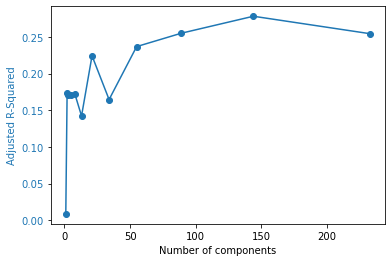

In [8]:
# Compute PCA with various numbers of components
components = [1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233] #[1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597]
accuracies = []
for n_components in components:
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
    models,_ = clf.fit(X_train_pca, X_test_pca, y_train, y_test)
    accuracies.append(models['Adjusted R-Squared'][0])

# Plot explained variance and accuracy
fig, ax1 = plt.subplots()
ax1.plot(components, accuracies, '-o', color='C0')
ax1.set_xlabel('Number of components')
ax1.set_ylabel('Adjusted R-Squared', color='C0')
ax1.tick_params(axis='y', labelcolor='C0')

plt.show()

### Variance vs Adjusted R2 Experiment
Load any dataset and partition it using train test split before running this cell. Ensure number of columns > number of components

100%|██████████| 16/16 [03:03<00:00, 11.45s/it]


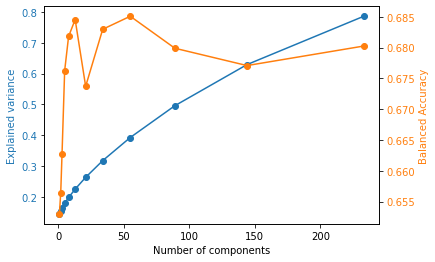

In [ ]:
# Compute PCA with various numbers of components
components = [1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233]
explained_variance = []
accuracies = []
for n_components in components:
    pca = TruncatedSVD(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    explained_variance.append(np.sum(pca.explained_variance_ratio_))

    clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None,regressors=regressor_list)
    models,_ = clf.fit(X_train_pca, X_test_pca, y_train, y_test)
    accuracies.append(models['Adjusted R-Squared'][0])

# Plot explained variance and accuracy
fig, ax1 = plt.subplots()
ax1.plot(components, explained_variance, '-o', color='C0')
ax1.set_xlabel('Number of components')
ax1.set_ylabel('Explained variance', color='C0')
ax1.tick_params(axis='y', labelcolor='C0')

ax2 = ax1.twinx()
ax2.plot(components, accuracies, '-o', color='C1')
ax2.set_ylabel('Adjusted R-Squared', color='C1')
ax2.tick_params(axis='y', labelcolor='C1')

plt.show()